# Algorytm k najbliższych sąsiadów
### Przygotowania

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from utils import get_4_classes_from_target, load_clean_data

In [2]:
dataset = load_clean_data()

# wyodrębnienie "target" i "features"
target = dataset[['RE']]
features = dataset.drop('RE', axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(features), columns=['Cin', 'OD', 'pH'])
X.head()

Cin        OD        pH
0  0.628491 -0.094121 -0.763522
1  1.482609  0.031178 -1.073821
2  0.371303  0.040128 -1.590985
3 -0.222452 -0.031471 -1.177253
4 -0.228802  0.120678 -0.660089

In [4]:
# zamiana wartości RE na klasy
y = get_4_classes_from_target(target)

In [5]:
# podział na dane testowe i do treningu
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5, stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [7]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [8]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 54.54545454545454 % and k = [11, 12, 13, 14, 15, 16, 17, 18, 19]


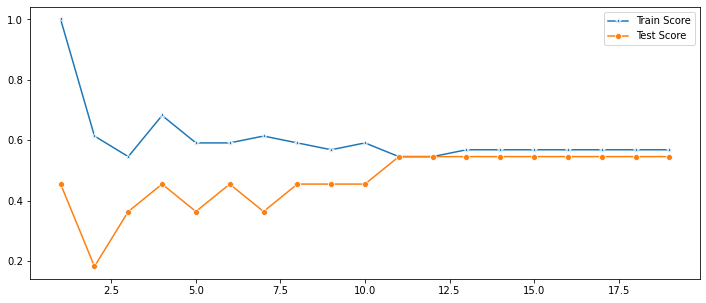

In [9]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [10]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5454545454545454

In [11]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
y_pred
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  1  2  All
True                
0          0  1    1
1          1  2    3
2          1  5    6
3          0  1    1
All        2  9   11

In [12]:
y_pred.tolist()

[2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2]

In [13]:
y_test.tolist()

[2, 0, 1, 1, 2, 1, 3, 2, 2, 2, 2]

In [14]:
X_test.values.tolist()

[[-0.17164916225507953, 0.24597689261818118, -0.7635221751103447],
 [-0.5907703131553845, 0.0759280352577689, -0.6600893681372605],
 [-0.5082161470689608, -0.39841877737917203, 0.06394028067427392],
 [-0.7114264020509269, 0.058028155535619685, -0.3497909472180354],
 [-0.5209167880053338, -0.058321062658346454, -0.5566565611641855],
 [-0.22245172600057117, -0.03147124307512338, -1.177253403002654],
 [2.71774665076975, -0.16572034099123875, -0.3497909472180354],
 [-0.7146015622850201, 0.541324908033635, -0.7635221751103447],
 [-0.13037207921186766, -0.6758669130724764, 0.27080589462043314],
 [-0.1652988417868931, -0.613217334044956, 0.6845371225127425],
 [-0.4764645447280286, -2.098907350983298, 2.236029227108905]]

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.56      0.83      0.67         6
           3       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.26      0.29      0.27        11
weighted avg       0.44      0.55      0.47        11



C:\Users\cyrpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
